<a href="https://colab.research.google.com/github/hhidayatinc/Machine_Learning/blob/main/js02_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Hidayati Nur Chasanah
Nim: 2241727016

In [1]:
#connect googledrive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import package
import numpy as np
import pandas as pd

In [ ]:
# baca data
data = pd.read_csv('/content/drive/MyDrive/dataset/world.csv')
data = data.dropna()
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [ ]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         140 non-null    object 
 1   Ladder                   140 non-null    int64  
 2   SD of Ladder             140 non-null    int64  
 3   Positive affect          140 non-null    float64
 4   Negative affect          140 non-null    float64
 5   Social support           140 non-null    float64
 6   Freedom                  140 non-null    float64
 7   Corruption               140 non-null    float64
 8   Generosity               140 non-null    float64
 9   Log of GDP per capita    140 non-null    float64
 10  Healthy life expectancy  140 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.1+ KB


,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,79.157143,78.450000,78.242857,79.157143,77.500000,78.828571,75.700000,78.850000,79.014286,75.478571
std,45.700664,46.121255,44.331627,44.506126,45.815787,45.108972,42.656011,44.727782,43.356310,43.979961
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,40.750000,39.750000,40.750000,40.750000,36.750000,39.750000,39.750000,40.750000,41.750000,36.750000
50%,79.500000,77.500000,78.500000,78.500000,77.500000,79.500000,76.500000,79.500000,78.500000,77.500000
75%,119.250000,119.250000,116.250000,117.250000,118.250000,118.250000,112.250000,116.250000,117.250000,113.250000
max,156.000000,156.000000,154.000000,154.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

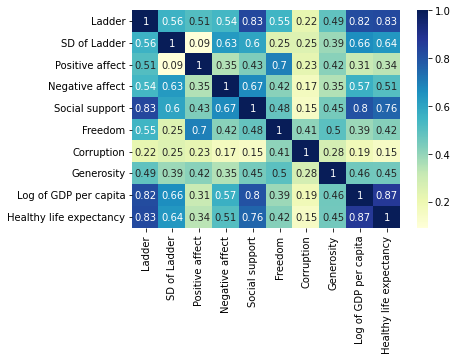

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['Log of GDP per capita']
y = data['Healthy life expectancy']

# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# hasil training dtaset
X_train
y_train

88      79.0
85      91.0
23       5.0
142    111.0
116     77.0
       ...  
98     147.0
117    137.0
76      80.0
26      85.0
8        8.0
Name: Healthy life expectancy, Length: 98, dtype: float64

In [ ]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
# analisis statistika dari garis regresi
lr.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Healthy life expectancy   R-squared:                       0.784
Model:                                 OLS   Adj. R-squared:                  0.781
Method:                      Least Squares   F-statistic:                     347.7
Date:                     Wed, 14 Sep 2022   Prob (F-statistic):           1.12e-33
Time:                             12:12:01   Log-Likelihood:                -435.76
No. Observations:                       98   AIC:                             875.5
Df Residuals:                           96   BIC:                             880.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.3229      4.149      1.042      0.300      -3.913      12.559
Log of GDP per capita     0.9130      0.049     18.646      0.000       0.816       1.010
==============================================================================
Omnibus:                        1.369   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                1.345
Skew:                           0.275   Prob(JB):                        0.510
Kurtosis:                       2.839   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

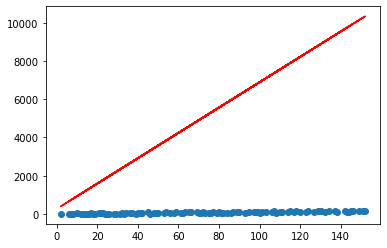

In [ ]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

In [ ]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


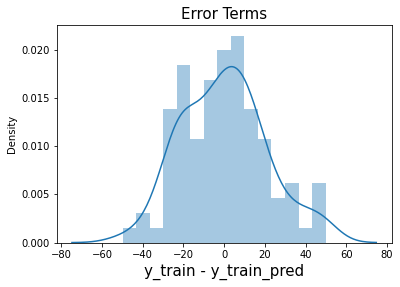

In [ ]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

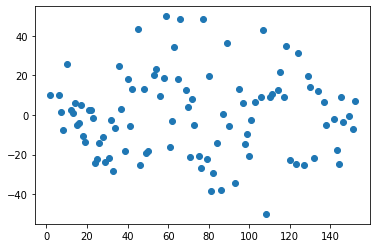

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


155    132.138102
110    119.356579
150    133.051068
124    112.965818
91      80.099047
dtype: float64

In [ ]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.6788217979373888

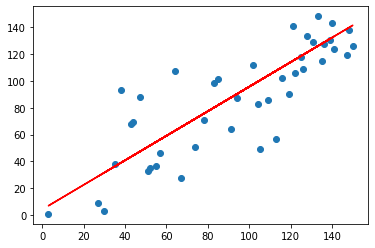

In [ ]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()